<h1>Computational Neuroscience Experiment 3</h1>
<h3>Roshan Srivastava

J047

MBA Tech. EXTC SEM 8</h3>

<h2>Part 1: Calculating Characteristics</h2>

In [29]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
def shannon_entropy(x):
    prob_energy = pow(x,2)/np.sum(pow(x,2))
    shannon = - np.sum(prob_energy*np.log2(prob_energy))
    return shannon

def lee(x):
    prob_energy = pow(x,2)/np.sum(pow(x,2))
    log_energy = np.sum(prob_energy*np.log(prob_energy))
    return log_energy

In [31]:
def individual_chars(path):
    data = pd.read_csv(path)
    for col in ['FZ -A2 ', 'CZ -A1 ','PZ -A2 ', 'BP2-REF']:
        data.pop(col)
    print(f"Individual Data for {path}\n")
    data_chars = pd.DataFrame({"Mean":data.mean(),"Median":data.median(),"Summation":data.sum(),"Variance":data.var(),"Standard Deviation":data.std(),"Shannon Entropy":shannon_entropy(data),"Log Energy Entropy":lee(data)})
    return data_chars


In [32]:
def hemisphere_chars(path):
    print(f"Hemisphere Data for {path}")
    data = pd.read_csv(path)
    for col in ['FZ -A2 ', 'CZ -A1 ','PZ -A2 ', 'BP2-REF']:
        data.pop(col)
    right_hemisphere = data[[i for i in data.columns if "A2" in i]].sum()
    left_hemisphere = data[[i for i in data.columns if "A1" in i]].sum()
    combined = pd.DataFrame({"Mean":[left_hemisphere.mean(),right_hemisphere.mean()],"Median":[left_hemisphere.median(),right_hemisphere.median()],"Summation":[left_hemisphere.sum(),right_hemisphere.sum()],"Variance":[left_hemisphere.var(),right_hemisphere.var()],"Standard Deviation":[left_hemisphere.std(),right_hemisphere.std()],"Shannon Entropy":[shannon_entropy(left_hemisphere),shannon_entropy(right_hemisphere)],"Log Energy Entropy":[lee(left_hemisphere),lee(right_hemisphere)]})
    combined.index = ["Left","Right"]
    combined = combined.transpose()
    return combined

In [33]:
def ecg_chars(path):
    print(f"ECG Data for {path}")
    data = pd.read_csv(path)
    data = data[["BP1-REF","BP2-REF"]]
    bp1 = data["BP1-REF"]
    bp2 = data["BP2-REF"]
    combined = pd.DataFrame({"Mean":[bp2.mean(),bp1.mean()],"Median":[bp2.median(),bp1.median()],"Summation":[bp2.sum(),bp1.sum()],"Variance":[bp2.var(),bp1.var()],"Standard Deviation":[bp2.std(),bp1.std()],"Shannon Entropy":[shannon_entropy(bp2),shannon_entropy(bp1)],"Log Energy Entropy":[lee(bp2),lee(bp1)]})
    combined.index = ["BP1","BP2"]
    combined = combined.transpose()
    return combined

In [34]:
for file in list(glob.glob("*"))[:2]:
    print(individual_chars(file),"\n\n")
    
for file in list(glob.glob("*"))[:2]:
    print(hemisphere_chars(file),"\n\n")
    
for file in list(glob.glob("*"))[:2]:
    print(ecg_chars(file),"\n\n")

Individual Data for 5_filtered.csv

             Mean  Median  Summation       Variance  Standard Deviation  \
FP2-A2   0.037109    -1.0       95.0     826.277247           28.745039   
F8 -A2   0.013281     0.0       34.0     374.283528           19.346409   
T4 -A2   0.019922    -1.0       51.0     629.104331           25.081952   
T6 -A2  -0.014453     0.0      -37.0     361.839963           19.022091   
F4 -A2   0.015234    -0.5       39.0     367.993906           19.183167   
C4 -A2   0.032813    -1.0       84.0     399.743354           19.993583   
P4 -A2   0.003125     0.0        8.0     576.565836           24.011785   
O2 -A2   0.007422     0.0       19.0     325.106236           18.030703   
FP1-A1  -0.016016     1.0      -41.0    1015.930576           31.873666   
F7 -A1  -0.012109     0.0      -31.0     682.249560           26.119907   
T3 -A1  -0.008594     0.0      -22.0     475.606804           21.808411   
T5 -A1  -0.006250     0.0      -16.0     524.801837           22

<h2>Part 2: Unfiltered Data Graphs</h2>

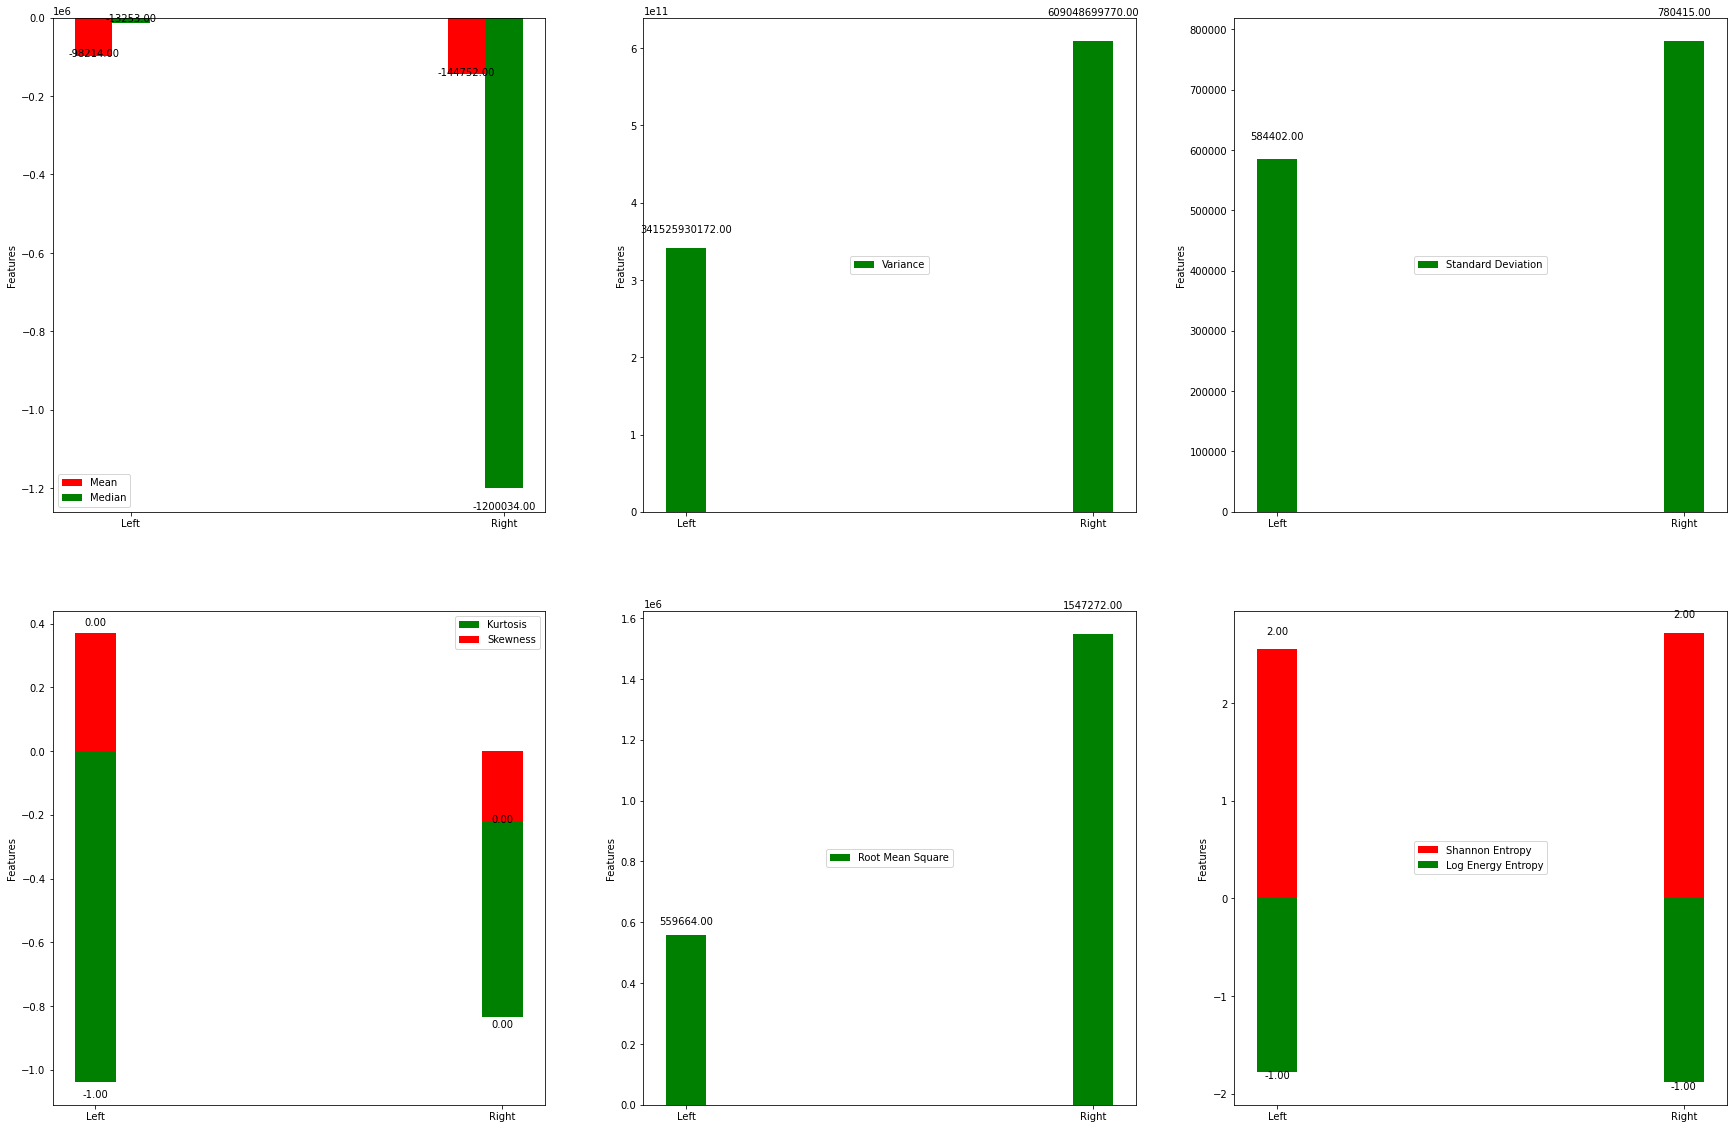

In [38]:
N = 2
ind = np.arange(N) 
width = 0.1      

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(2,3,1)

mean = [-98214.66,-144752.0]
rects1 = ax.bar(ind, mean, width, color='r')

median = [-13253.0,-1200034.5]
rects2 = ax.bar(ind+width, median, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Mean','Median'],loc="best")
def autolabel(rects):
  for rect in rects:
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%0.2f'%int(h),ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax = fig.add_subplot(2,3,2)
var = [341525930172.0,609048699770.4888]
rects1 = ax.bar(ind+width, var, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Variance'],loc="center")
autolabel(rects1)

ax = fig.add_subplot(2,3,3)
std = [584402.19,780415.72]
rects1 = ax.bar(ind+width, std, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Standard Deviation'],loc="center")
autolabel(rects1)

ax = fig.add_subplot(2,3,4)
kurt = 	[-1.0395,-0.833]
rects2 = ax.bar(ind+width, kurt, width, color='g')

skew = [0.370,-0.219]
rects1 = ax.bar(ind+width, skew, width, color='r')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Kurtosis','Skewness'],loc="best")
autolabel(rects1)
autolabel(rects2)

ax = fig.add_subplot(2,3,5)
rms = [559664.833,1547272.762]
rects1 = ax.bar(ind+width, rms, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Root Mean Square'],loc="center")
autolabel(rects1)

ax = fig.add_subplot(2,3,6)
se = [2.560,2.720]
rects1 = ax.bar(ind+width, se, width, color='r')

lee = [-1.774	,-1.885]
rects2 = ax.bar(ind+width, lee, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Shannon Entropy','Log Energy Entropy'],loc="center")
autolabel(rects1)
autolabel(rects2)


<h2>Part 3: Filtered Data Graphs</h2>

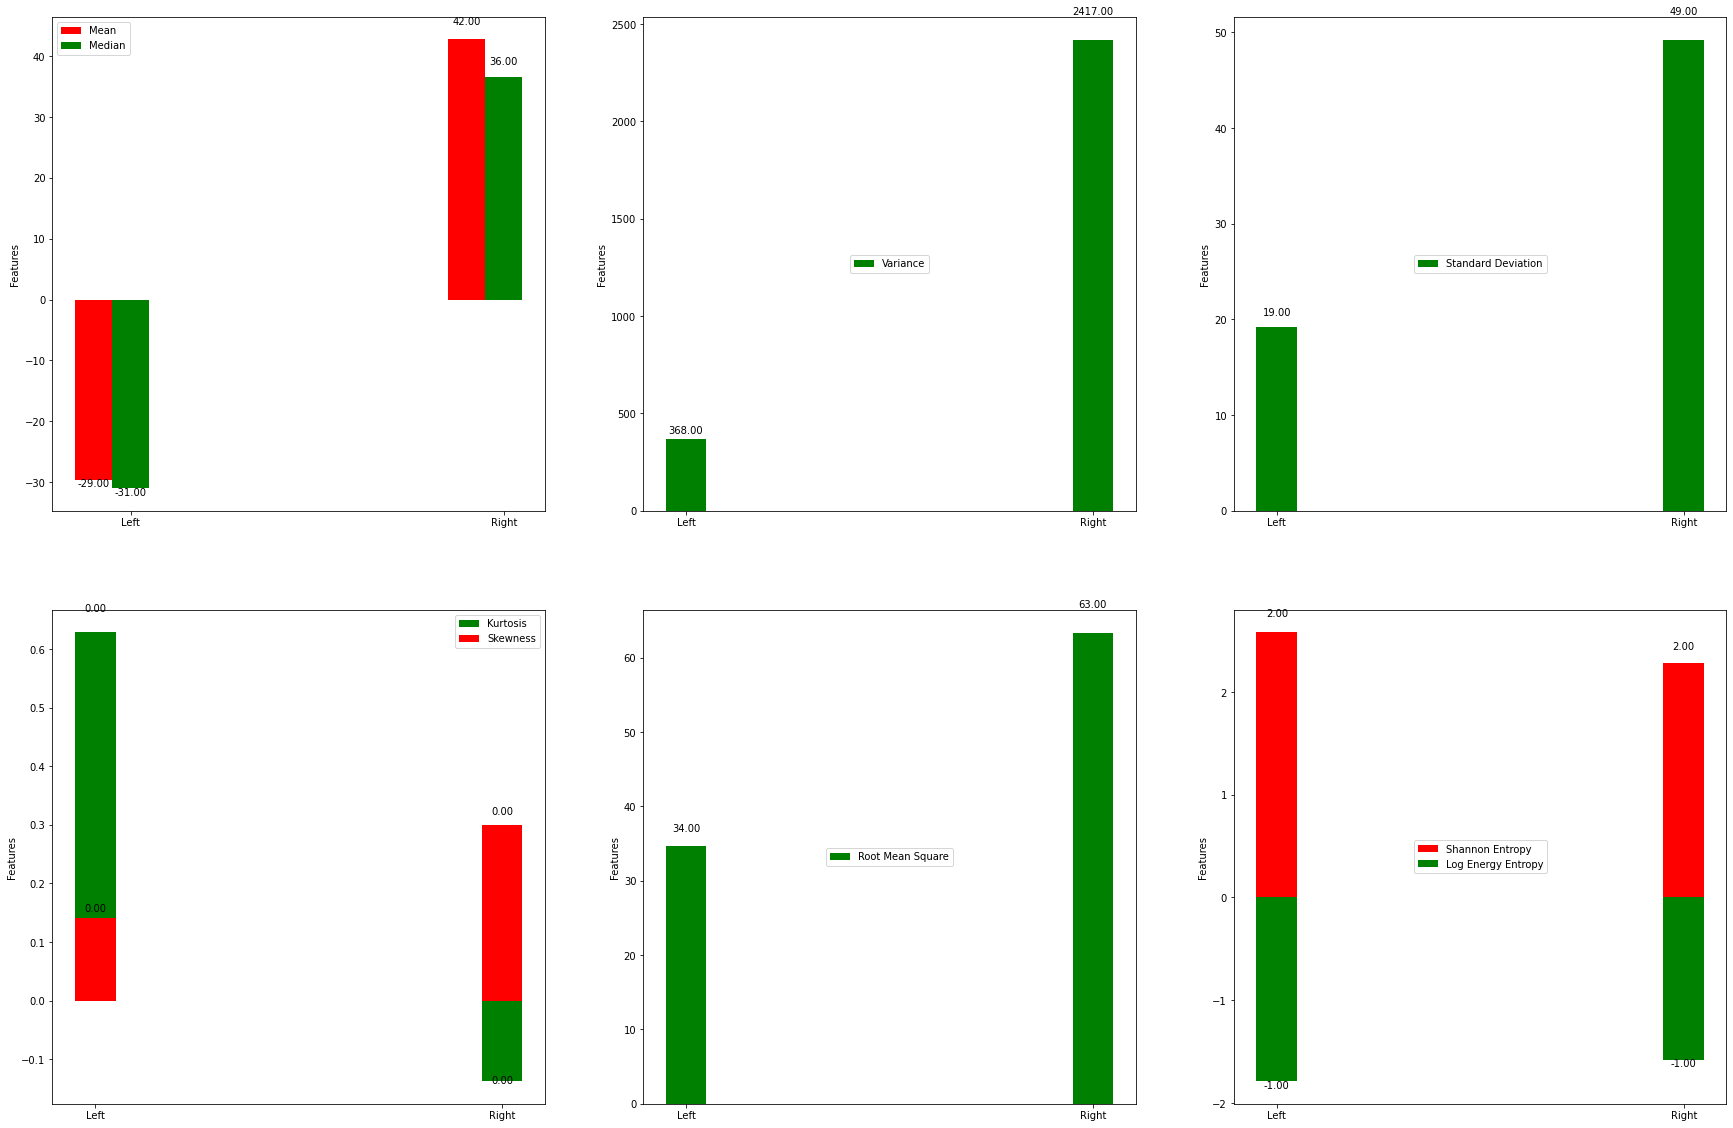

In [39]:
N = 2
ind = np.arange(N) 
width = 0.1      

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(2,3,1)

mean = [-29.555	, 42.8]
rects1 = ax.bar(ind, mean, width, color='r')

median = [-31.0	, 36.5]
rects2 = ax.bar(ind+width, median, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Mean','Median'],loc="best")
def autolabel(rects):
  for rect in rects:
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%0.2f'%int(h),ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax = fig.add_subplot(2,3,2)
var = [368.777	,2417.733]
rects1 = ax.bar(ind+width, var, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Variance'],loc="center")
autolabel(rects1)

ax = fig.add_subplot(2,3,3)
std = [19.203	, 49.170]
rects1 = ax.bar(ind+width, std, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Standard Deviation'],loc="center")
autolabel(rects1)

ax = fig.add_subplot(2,3,4)
kurt = 	[0.629, -0.138]
rects2 = ax.bar(ind+width, kurt, width, color='g')

skew = [0.141,0.300]
rects1 = ax.bar(ind+width, skew, width, color='r')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Kurtosis','Skewness'],loc="best")
autolabel(rects1)
autolabel(rects2)

ax = fig.add_subplot(2,3,5)
rms = [34.660	, 63.307]
rects1 = ax.bar(ind+width, rms, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Root Mean Square'],loc="center")
autolabel(rects1)

ax = fig.add_subplot(2,3,6)
se = [2.583	, 2.282]
rects1 = ax.bar(ind+width, se, width, color='r')

lee_met = [-1.790, -1.582]
rects2 = ax.bar(ind+width, lee_met, width, color='g')

ax.set_ylabel('Features')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Left', 'Right') )
ax.legend(['Shannon Entropy','Log Energy Entropy'],loc="center")
autolabel(rects1)
autolabel(rects2)
